<a href="https://colab.research.google.com/github/danilotpnta/UN-General-Debate-Analysis-SDGs/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UN-General-Debate-Analysis-SDGs

This project analyzes the UN General Debate Corpus from 1970 to 2023. It includes exploratory data analysis (EDA), predictive modeling, and data visualizations focusing on uncovering insights from political speeches and their connection to global challenges.

The project is divided into the following sections:

1. Data Collection
2. Data Preprocessing
3. Exploratory Data Analysis
4. Predictive Modeling
5. Data Visualization

## If running from Google Colab

In [90]:
# Clone your GitHub repository
!git clone https://github.com/danilotpnta/UN-General-Debate-Analysis-SDGs.git

# Navigate to the repository folder
%cd /content/UN-General-Debate-Analysis-SDGs

Cloning into 'UN-General-Debate-Analysis-SDGs'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 82 (delta 11), reused 9 (delta 2), pack-reused 49 (from 1)
Receiving objects: 100% (82/82), 92.40 MiB | 24.15 MiB/s, done.
Resolving deltas: 100% (30/30), done.
[Errno 2] No such file or directory: '/content/UN-General-Debate-Analysis-SDGs'
/Users/datoapanta/code/UN-General-Debate-Analysis-SDGs


## 1. Data Collection (skip data already downloaded)

#### Donwloading the UNGDC dataset

This dataset contains the speeches from the UN General Debate from 1970 to 2023 ([link](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y)).

Aditionally, we will download the standard country or area codes for statistical use (M49) ([link](https://unstats.un.org/unsd/methodology/m49/overview/))

In [31]:
from importlib import reload
import utils.dataverse_downloader as dataverse_downloader

# Reload the module
reload(dataverse_downloader)

# Call the function to download all files
dataverse_downloader.download_dataset()

File already downloaded: Raw_PDFs_1946-1969.tgz
File already downloaded: Raw_PDFs_1970-1990.tgz
File already downloaded: Raw_PDFs_1991-2022.tgz
File already downloaded: README.txt
File already downloaded: Speakers_by_session.xlsx
File already downloaded: UNGDC_1946-2023.tgz
Uncompressing data...
Data already uncompressed: data/raw/Raw_PDFs_1946-1969
Data already uncompressed: data/raw/Raw_PDFs_1970-1990
Data already uncompressed: data/raw/Raw_PDFs_1991-2022
Data already uncompressed: data/raw/UNGDC_1946-2023


#### Donwloading the Happyness Report
The dataset provides insight into how people across the world perceive their quality of life. It uses survey data from the Gallup World Poll to assess subjective well-being, life evaluations, emotional experiences, and other key happiness indicators. ([link](https://worldhappiness.report/ed/2024/#appendices-and-data))

In [68]:
import os
import requests

# URL of the CSV file (you need to extract the direct URL of the file from the page)
url = 'https://happiness-report.s3.amazonaws.com/2024/DataForTable2.1.xls'  

# Send a GET request to download the file
response = requests.get(url)

# Save the file locally
output_dir = os.path.join('data', 'raw')
dataset_name = 'happiness.xls' 

HAPPINESS_XLS = os.path.join(output_dir, dataset_name)

with open(HAPPINESS_XLS, 'wb') as file:
    file.write(response.content)

print(f"XLS file '{dataset_name}' downloaded successfully!")

XLS file 'happiness.xls' downloaded successfully!


#### Donwloading the Armed Conflict Dataset
A conflict-year dataset with information on armed conflict where at least one party is the government of a state in the time period 1946-2023. ([link](https://ucdp.uu.se/downloads/index.html#armedconflict))

In [69]:
import requests
import zipfile
import io

# URL of the ZIP file
url = 'https://ucdp.uu.se/downloads/ucdpprio/ucdp-prio-acd-241-csv.zip'

output_dir = os.path.join('data', 'raw')
dataset_name = 'UcdpPrioConflict_v24_1.csv'
UCDP_PRIO_CONFLICT_CSV = os.path.join(output_dir, dataset_name)

# Send a GET request to download the ZIP file
response = requests.get(url)

# Extract all files in the ZIP archive to the output directory
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall(output_dir)

print(f"CSV file '{dataset_name}' downloaded successfully!")

CSV file 'UcdpPrioConflict_v24_1.csv' downloaded successfully!


## 2. Data Preprocessing

In [32]:
import os
import pandas as pd

# Define file paths
raw_file_path = os.path.join('data', 'raw', 'Speakers_by_session.xlsx')  
processed_file_path = os.path.join('data', 'processed', 'Speakers_by_session_processed.parquet')  

# Check if the processed file exists
if os.path.exists(processed_file_path):
    print(f"Loading processed data from {processed_file_path}...")
    df_speakers = pd.read_parquet(processed_file_path)
else:
    print(f"Processing raw data from {raw_file_path}...")
    df_speakers = pd.read_excel(raw_file_path)
    
    print(f"Saving processed data to {processed_file_path}...")
    df_speakers.to_parquet(processed_file_path)

# Display the first 15 rows of the DataFrame
df_speakers.head(15)

Loading processed data from data/processed/Speakers_by_session_processed.parquet...


,Year,Session,ISO Code,Country,Name of Person Speaking,Post,Unnamed: 6
0,2023,78,BRA,Brazil,Luiz Inacio Lula da Silva,President,None
1,2023,78,USA,United States of America,Joseph R. Biden,President,None
2,2023,78,COL,Colombia,Gustavo Petro Urrego,President,None
3,2023,78,JOR,Jordan,Abdullah II ibn Al Hussein,King,None
4,2023,78,POL,Poland,Andrzej Duda,President,None
5,2023,78,CUB,Cuba,Miguel Diaz-Canel Bermudez,President,None
6,2023,78,TUR,Turkey,Recep Tayyip Erdogan,President,None
7,2023,78,PRT,Portugal,Marcelo Rebelo de Sousa,President,None
8,2023,78,QAT,Qatar,Tamim bin Hamad Al Thani,Amir,None
9,2023,78,ZAF,South Africa,Matamela Cyril Ramaphosa,President,None


In [84]:
import os
import zipfile
import pandas as pd

# Define file paths
base_path = os.path.join('data', 'raw', 'UNGDC_1946-2023')
processed_file_path = os.path.join('data', 'processed', 'UNGDC_1946-2023_processed.parquet')
zip_file_path = os.path.join('data', 'processed', 'UNGDC_1946-2023_processed.zip')

# Check if the Parquet file exists
if os.path.exists(processed_file_path):

    print(f"Loading processed data from {processed_file_path}...")
    df_ungdc = pd.read_parquet(processed_file_path)

elif os.path.exists(zip_file_path):

    print(f"Unzipping {zip_file_path}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        #  Extract to the directory of the Parquet file
        zip_ref.extractall(os.path.dirname(processed_file_path))  

    # Now load the unzipped Parquet file
    print(f"Loading processed data from {processed_file_path}...")
    df_ungdc = pd.read_parquet(processed_file_path)
else:
    data = []

    # Walk through the base directory and process each session
    for session_folder in os.listdir(base_path):
        session_path = os.path.join(base_path, session_folder)

        # Ensure that it is a directory
        if os.path.isdir(session_path):
            session_number = session_folder.split(' ')[1]  # Extract session number (e.g., '01')
            year = session_folder.split(' ')[-1]          # Extract the year (e.g., '1946')

            # Loop through the text files in each session directory
            for txt_file in os.listdir(session_path):
                if txt_file.endswith('.txt'):
                    file_path = os.path.join(session_path, txt_file)

                    # Read the content of the text file
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()

                    # Extract country code from the file name
                    country_code = txt_file.split('_')[0]  # Extract country code (e.g., 'CAN')

                    # Append the data to the list
                    data.append({
                        'Session': session_number,
                        'Year': year,
                        'ISO-alpha3 Code': country_code,
                        'Speech': content
                    })

    # Convert the data into a DataFrame for easy analysis
    df_ungdc = pd.DataFrame(data)

    # Convert 'Year' column to numeric to ensure it is treated as an integer
    df_ungdc['Year'] = pd.to_numeric(df_ungdc['Year'], errors='coerce')

    # Sort the DataFrame by Year, Session, and Country Code
    df_ungdc = df_ungdc.sort_values(by=['Year', 'Session', 'ISO-alpha3 Code'], ascending=[True, True, True])

    # Reset the index for a cleaner DataFrame
    df_ungdc.reset_index(drop=True, inplace=True)

    # Save the processed DataFrame as a Parquet file
    print(f"Saving processed data to {processed_file_path}...")
    df_ungdc.to_parquet(processed_file_path)

    # Zip the Parquet file
    print(f"Compressing {processed_file_path} into {zip_file_path}...")
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        zipf.write(processed_file_path, os.path.basename(processed_file_path))

# Display the first few rows of the DataFrame
df_ungdc.head(15)

Saving processed data to data/processed/UNGDC_1946-2023_processed.parquet...
Compressing data/processed/UNGDC_1946-2023_processed.parquet into data/processed/UNGDC_1946-2023_processed.zip...


,Session,Year,ISO-alpha3 Code,Speech
0,01,1946,ARG,At the resumption of the first session of the ...
1,01,1946,AUS,The General Assembly of the United Nations is ...
2,01,1946,BEL,The\tprincipal organs of the United Nations ha...
3,01,1946,BLR,As more than a year has elapsed since the Unit...
4,01,1946,BOL,Coming to this platform where so many distingu...
5,01,1946,BRA,I would first like to express to the city of N...
6,01,1946,CAN,"If were not anxious, like all my colleagues, ..."
7,01,1946,CHL,I shall occupy this rostrum for a few minutes ...
8,01,1946,CHN,My first words must be to express to the Gover...
9,01,1946,COL,The Colombian delegation does not consider it ...


In [64]:
df_codes = pd.read_csv("data/raw/UNSD_Methodology.csv", sep=";")
df_codes.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


Looking at the data we would like to combine the `df_ungdc` to the `df_codes` to obtain information about the countries and regions. We will also combine the `df_ungdc` to the `df_happiness` to obtain information about the happiness index of the countries. 

In [86]:
# Merging the two DataFrames on the 'ISO-alpha3 Code'
df_un_merged = pd.merge(df_codes, df_ungdc, on='ISO-alpha3 Code', how='inner')

# Selecting specific columns for the merged DataFrame
df_un_merged = df_un_merged[['Country or Area', 'Region Name', 'Sub-region Name', 'ISO-alpha3 Code', 'Least Developed Countries (LDC)', 
                       'Session', 'Year', 'Speech']]

# Setting the index to 'Year' and 'ISO-alpha3 Code'
df_un_merged.set_index(['Year', 'ISO-alpha3 Code'], inplace=True)

# Display the merged DataFrame
df_un_merged.head()


,,Country or Area,Region Name,Sub-region Name,Least Developed Countries (LDC),Session,Speech
Year,ISO-alpha3 Code,,,,,,
1962,DZA,Algeria,Africa,Northern Africa,NaN,17,47.\tIt is both a great honour and an immense ...
1964,DZA,Algeria,Africa,Northern Africa,NaN,19,1.\tThe Algerian delegation is taking part in ...
1965,DZA,Algeria,Africa,Northern Africa,NaN,20,45. In celebrating its twentieth anniversa...
1966,DZA,Algeria,Africa,Northern Africa,NaN,21,"\n121. Mr. President, I am especially happ..."
1967,DZA,Algeria,Africa,Northern Africa,NaN,22,76. The twenty-second general debate is drawin...


In [71]:
df_happiness = pd.read_excel(HAPPINESS_XLS, index_col=[0,1]) 
df_happiness.head()

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008     3.723590            7.350416        0.450662   
             2009     4.401778            7.508646        0.552308   
             2010     4.758381            7.613900        0.539075   
             2011     3.831719            7.581259        0.521104   
             2012     3.782938            7.660506        0.520637   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                         50.500000   
             2009                         50.799999   
             2010                         51.099998   
             2011                         51.400002   
             2012                         51.700001   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                      0.718114    0.164055   
             2009                      0.678896    0.187297   
             2010                      0.600127    0.117861   
             2011                      0.495901    0.160098   
             2012                      0.530935    0.234157   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2008                   0.881686         0.414297         0.258195  
             2009                   0.850035         0.481421         0.237092  
             2010                   0.706766         0.516907         0.275324  
             2011                   0.731109         0.479835         0.267175  
             2012                   0.775620         0.613513         0.267919

### Removing stop words


In [34]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/datoapanta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/datoapanta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/datoapanta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/datoapanta/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

<Axes: xlabel='Samples', ylabel='Counts'>

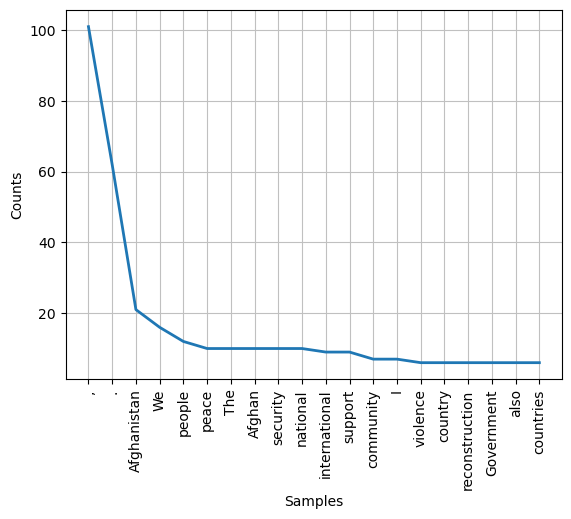

In [88]:
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords

def preprocess(words):
    sw = stopwords.words("english")
    no_sw = []
    for w in words:
        if (w not in sw):
            no_sw.append(w)
    return no_sw

text = df_un_merged.loc[2002,"AFG"]["Speech"]

words = word_tokenize(text)
words = preprocess(words)
freq = FreqDist(words)

freq.plot(20)


## 3. Exploratory Data Analysis
